## Script that produces plot in the GRL paper
This script uses files produced by simulation and produce plots and stats for the GRL paper

In [31]:
import neuralsw.model.modeltools as model
import numpy as np
import os
import glob
import xarray as xr
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook


In [34]:
#Reference dataset (uncomment the one you want)

#rootdir
rootdir = os.path.realpath(\
    os.path.join(os.getcwd(),'../..'))

#directory to store the data
datadir = os.path.realpath(os.path.join(rootdir,'data'))

#Liste of simulation to plot and test
lfiles = {'noise01_std','noise01_warsmooth','noise01_windlow'}


In [35]:
#load datasets
d = dict()
for files in lfiles:
    name = files
    for suf in {'nn','00'}:
        f = glob.glob(os.path.join(datadir,'run_*'+name+'*'+suf+'.nc'))[0]
        d[name+suf] = xr.open_dataset(f)

In [36]:
#Compute diagnostic quantities
Ec = dict()
Ep = dict()
Pv = dict()
umax = dict()
for k in d:
    Ec[k] = model.cinetic_ener(ds=d[k])
    Pv[k] = model.potential_vor(ds=d[k])
    Ep[k] = model.potential_ener(ds=d[k])
    umax[k] = model.aumax(d[k])
    


In [86]:
## Compute intervals
def add_stats(dp,name,mean,std):
    dp[name+'_mean'].append(mean.statistic)
    dp[name+'_mean_delta'].append((mean.minmax[1]-mean.minmax[0])/2)
    dp[name+'_std'].append(std.statistic)
    dp[name+'_std_delta'].append((std.minmax[1]-std.minmax[0])/2)

dp = dict()
for k in {'mean','mean_delta','std','std_delta'}:
    dp['Ec_'+k] = []
    dp['Pv_'+k] = []
    dp['Ep_'+k] = []
    dp['umax_'+k] = []
index = []
for k in d:
    index.append(k)
    mean,_,std = stats.bayes_mvs(Ec[k][::5],alpha=0.99)
    add_stats(dp,'Ec',mean,std)
    mean,_,std = stats.bayes_mvs(Pv[k][::5],alpha=0.99)
    add_stats(dp,'Pv',mean,std)
    mean,_,std = stats.bayes_mvs(Ep[k][::5],alpha=0.99)
    add_stats(dp,'Ep',mean,std)
    mean,_,std = stats.bayes_mvs(umax[k][::5],alpha=0.99)
    add_stats(dp,'umax',mean,std)
    
df = pd.DataFrame(dp,index=index)
df.sort_index(inplace=True)
df

,Ec_mean,Ec_mean_delta,Ec_std,Ec_std_delta,Ep_mean,Ep_mean_delta,Ep_std,Ep_std_delta,Pv_mean,Pv_mean_delta,Pv_std,Pv_std_delta,umax_mean,umax_mean_delta,umax_std,umax_std_delta
noise01_std00,24.968866,1.057704,1.908804,0.788562,2544.704703,2.408074,4.345774,1.795320,7.332119e-08,1.302330e-10,2.350273e-10,9.709410e-11,50.916667,1.865827,3.367198,1.391052
noise01_stdnn,24.996693,1.055424,1.904689,0.786862,2545.010056,3.431818,6.193292,2.558563,7.338526e-08,1.756645e-10,3.170162e-10,1.309652e-10,50.666667,1.617877,2.919731,1.206195
noise01_warsmooth00,25.337868,1.116618,2.015125,0.832485,2544.487073,2.615383,4.719898,1.949877,7.336496e-08,1.503944e-10,2.714120e-10,1.121253e-10,50.458333,2.034664,3.671892,1.516926
noise01_warsmoothnn,24.355361,1.109920,2.003037,0.827492,2543.491432,2.376325,4.288478,1.771649,7.326562e-08,1.349837e-10,2.436007e-10,1.006360e-10,50.666667,1.564032,2.822559,1.166051
noise01_windlow00,11.802908,0.317452,0.572895,0.236674,2516.856835,0.766484,1.383248,0.571445,7.158999e-08,4.499698e-11,8.120461e-11,3.354712e-11,51.333333,0.749385,1.352392,0.558698
noise01_windlownn,11.985504,0.364056,0.657000,0.271419,2517.956044,0.800181,1.444061,0.596568,7.165258e-08,4.717060e-11,8.512728e-11,3.516765e-11,51.291667,0.726409,1.310926,0.541568


<IPython.core.display.Javascript object>


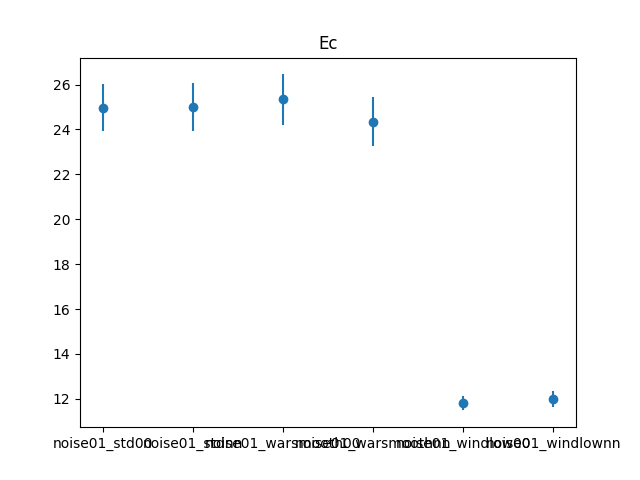

<IPython.core.display.Javascript object>


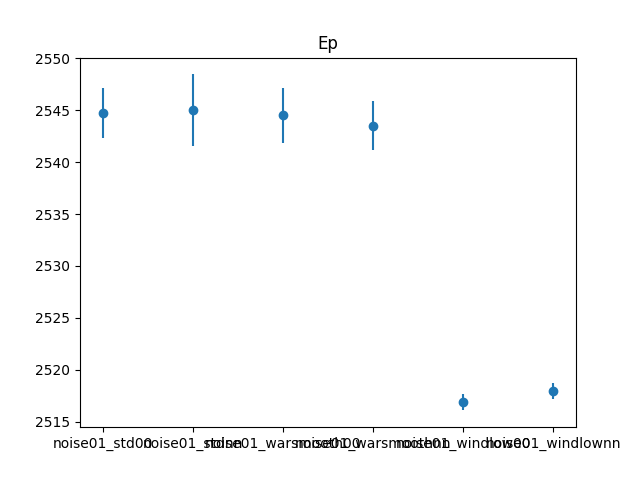

<IPython.core.display.Javascript object>


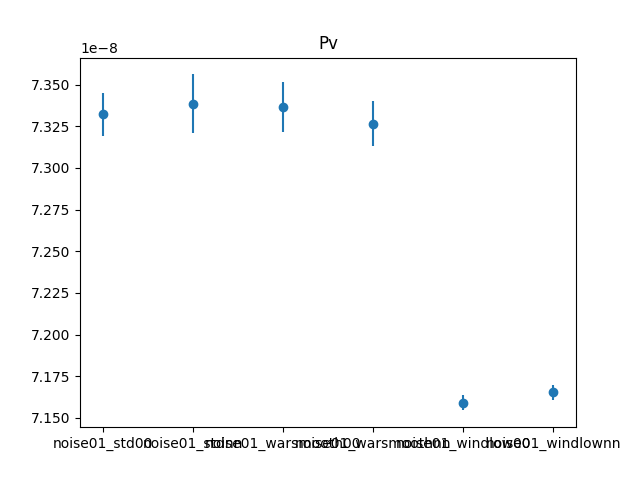

<IPython.core.display.Javascript object>


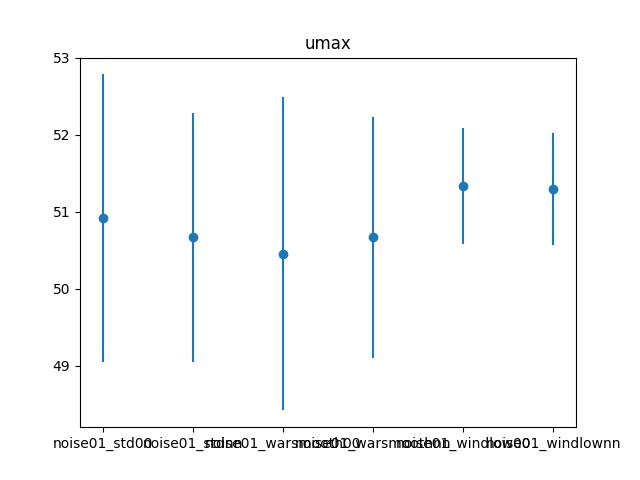

In [87]:
fig,ax = plt.subplots()

ax.errorbar(x=df.index,y=df['Ec_mean'],yerr=df['Ec_mean_delta'],fmt='o')
ax.set_title('Ec')
plt.show()

fig,ax = plt.subplots()

ax.errorbar(x=df.index,y=df['Ep_mean'],yerr=df['Ep_mean_delta'],fmt='o')
ax.set_title('Ep')
plt.show()
#df.index

fig,ax = plt.subplots()

ax.errorbar(x=df.index,y=df['Pv_mean'],yerr=df['Pv_mean_delta'],fmt='o')
ax.set_title('Pv')
plt.show()
#df.index

fig,ax = plt.subplots()

ax.errorbar(x=df.index,y=df['umax_mean'],yerr=df['umax_mean_delta'],fmt='o')
ax.set_title('umax')
plt.show()
#df.index


In [89]:
## test mean values at 95%
dp=dict()
dp['Ec']=[]
dp['Pv']=[]
dp['umax']=[]
dp['Ep']=[]
index = []
for f in lfiles:
    index.append(f)
    
print(index)

['noise01_std', 'noise01_warsmooth', 'noise01_windlow']
